<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-equivalent-of-within-subject/repeated-measures-ANOVA" data-toc-modified-id="Bayesian-estimation-equivalent-of-within-subject/repeated-measures-ANOVA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation equivalent of within subject/repeated measures ANOVA</a></span><ul class="toc-item"><li><span><a href="#The-classic-within-subject-ANOVA" data-toc-modified-id="The-classic-within-subject-ANOVA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The classic within subject ANOVA</a></span></li></ul></li><li><span><a href="#Add-to-this" data-toc-modified-id="Add-to-this-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Add to this</a></span></li><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bayesian inference</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span><ul class="toc-item"><li><span><a href="#Study/data-description" data-toc-modified-id="Study/data-description-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Study/data description</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#Clean-the-data" data-toc-modified-id="Clean-the-data-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Clean the data</a></span></li><li><span><a href="#Data-visualisation-and-exploratory-data-analysis" data-toc-modified-id="Data-visualisation-and-exploratory-data-analysis-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Data visualisation and exploratory data analysis</a></span></li></ul></li></ul></li><li><span><a href="#Step-2---define-the-descriptive-model" data-toc-modified-id="Step-2---define-the-descriptive-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 2 - define the descriptive model</a></span></li><li><span><a href="#Stan-model" data-toc-modified-id="Stan-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Stan model</a></span></li><li><span><a href="#Post-model-fit-visualisations---Bayesian-estimation-of-a-repeated-measures-ANOVA" data-toc-modified-id="Post-model-fit-visualisations---Bayesian-estimation-of-a-repeated-measures-ANOVA-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Post model fit-visualisations - Bayesian estimation of a repeated measures ANOVA</a></span><ul class="toc-item"><li><span><a href="#Posterior-distributions-plots" data-toc-modified-id="Posterior-distributions-plots-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Posterior distributions plots</a></span></li></ul></li><li><span><a href="#Reporting-the-results-of-the-Bayesian-one-sample-t-test-equivalent" data-toc-modified-id="Reporting-the-results-of-the-Bayesian-one-sample-t-test-equivalent-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Reporting the results of the Bayesian one sample t-test equivalent</a></span><ul class="toc-item"><li><span><a href="#Write-up" data-toc-modified-id="Write-up-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span><font size="3">Write up</font></a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [1]:
# Import analysis packages
%matplotlib inline
import pystan as ps
from patsy import dmatrix
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt
import scipy.stats as stats

Notebook formatting (code below centralise the plot outputs

In [2]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation equivalent of within subject/repeated measures ANOVA

## The classic within subject ANOVA

Traditoanl ANOVA are based on the use of Null hyptohesis of F-statistic and like all ANOVA require its calculation 

For repewithin subject/repeated measures ANOVA the F statisitc is calulated as such

1. First the sum sqaure total ($SS_T$) must be calculated 

$$SS_T = \sigma_{grand}^{2}(N-1)$$

2. After this the within subject varaince ($SS_W)$ needs to  be calculated 
$$ $$

# Add to this

# Bayesian inference
<font size = "3"> Following the quick description of the classic within subject ANOVA above its important to keep in mind that Bayesian analysis inference are all derived from the applciation of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent alternative to the eithin subject ANOVA, it is fundamentally different, becuase it uses fully probabilistic modelling and the infernce is not based on sampling distributions</font>
    
<font size = "1"> For a fuller description see the Practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. In the case of scientific research publication is the goal, as such the priors must be accepted by a skeptical audience. Much of this can be achieved using prior predcitve checks to acsetain os the priors are reasonable.

4. Using Bayes rule estimate the posterior for the parameters of the model using the likelihood and priors. Then interprete and the posterior

5. Conduct model checks. i.e. Posterior predictive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font> 

#  Step 1 - Identify the relevant data for question under investigation

## Study/data description

The following example data analysis https://www.sheffield.ac.uk/mash/statistics/datasets.


## Import data

In [3]:
# Call github repository
url = "https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/Data/Cholesterol_R.csv"
#Import data .csv file into pandas dataframe.
df = pd.read_csv(url)

In [4]:
# Output data frame for evaluation of proper import
df.head(1)

,ID,Before,After4weeks,After8weeks,Margarine
0,1,6.42,5.83,5.75,B


### Clean the data

Because this notebook is solely focused on modeling the within subject effects for individuals who consumed Margarine here.
Therefore, some data manipulation is required.

In [8]:
# First, drop all of the type A Marrgarines from the dataframe.
dfReduced = df[~df.Margarine.str.contains("A")]

In [10]:
# Print output to check the code has done what is described above
print(dfReduced)

    ID  Before  After4weeks  After8weeks Margarine
0    2    6.42         5.83         5.75         B
2    4    6.56         5.83         5.71         B
4    6    8.43         7.71         7.67         B
6    8    8.05         7.25         7.10         B
8   10    5.77         5.31         5.33         B
10  12    6.77         6.15         5.96         B
11  13    6.44         5.59         5.64         B
15  17    6.85         6.40         6.29         B
17  19    5.73         5.13         5.17         B


### Data visualisation and exploratory data analysis 

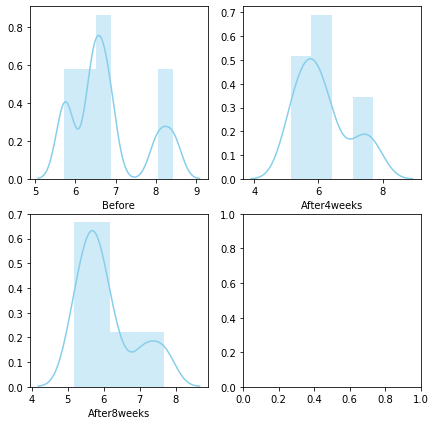

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.distplot(dfReduced['Before'], kde=True, color="skyblue", ax=axs[0, 0]);
sns.distplot(dfReduced['After4weeks'], kde=True, color="skyblue", ax=axs[0, 1]);
sns.distplot(dfReduced['After8weeks'], kde=True, color="skyblue", ax=axs[1, 0]);


# Step 2 - define the descriptive model

As the The Bugs book (Lunn, Jackson, Best, Thomas, & Spiegelhalter, 2012) shows repeated measures ANOVA type mdoels can be  estiamted within the Bayesian framework through the use of multivariate normal likelihood. The multivaraite normal model allows for the etiamtio of group means whule estiamteing and thus controlling for the correltaion between the repated observed data values. BUGS mdoels use inverse wishsart priors for the covariance matrices when estiamting correltion between data points. Stan, however, is not limited like Bugs in this way and the standard practice for stan users is to use LKJ priors (see, Lewandowski, Kurowicka, & Joe 2009, for further details).



# Stan model

In [159]:
repeatedMeasuresANOVA = """ 
data{
// The number of data points per group
int n; 
// The number of groups specified  
int k; 
// Data inputed in matrix form as the data is in wide format
matrix[n,k] y; 
}

parameters{
// vector for the mu parameter for each repeated grouped observations
// lower bound set to specify postive half normal for the prior 
// specified in the modle block as cholesterol levels cannot be negative.
vector<lower = 0>[k] mu;

//
vector<lower = 0>[k] sigma;

// Correlation matrix 
corr_matrix[k] omega;
}

transformed parameters{
matrix[k,k] Sigma; 
Sigma = quad_form_diag(omega, sigma);
}
model{

// priors
// Priors based of NHS estiamtes (https://www.nhs.uk/conditions/high-cholesterol/cholesterol-levels/)
// of average cholesterol within population
mu ~ normal(5, 1.5);

// Weakly informative prior https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations 
sigma ~ normal(0, 10);

// LKJ prior of one sets unifrom priros from -1,1 correlations.
// So the prior has been set to 2 as to give less probability to such exterme correltions 
// which are uncommom in biological research.
omega ~ lkj_corr(2);

// likelihood
// for loop required in the model as index the row of teh data in wide form
// to calcuate the means and correlation parameter estimates.
for(i in 1:n){
    y[i] ~ multi_normal(mu,  Sigma);
    }
}

generated quantities{
vector[k] yrep[n];

for(i in 1:n){
    yrep[i] = multi_normal_rng(mu,  Sigma);
    }
}

"""

In [160]:
sm = ps.StanModel(model_code = repeatedMeasuresANOVA)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5f6dc551bc7346776f5f439d88ce4073 NOW.


In [60]:
y = dfReduced.iloc[:, 1:4].values 
data = {'n': len(dfReduced),
        'k': y.shape[1],
        'y': y      
       }

In [114]:
fit = sm.sampling(data = data, iter = 2000,  chains = 2, seed = 1, control = dict(adapt_delta = .95) ) 

note for the warnings. In the case of the first warning, as dicsussed at this Stan discource thread https://discourse.mc-stan.org/t/what-does-this-warning-means-should-i-change-the-code-and-how/6806, these warnings for this model are fine it is the use of the correlatation matrix. In terms of the second watning this is due to the NAN result of the perfect correlations on the diagnoal of the correlations matrix.

In [116]:
# Because of python print statement it is easier to extract the results into a panda data frame for viewing.
summary = fit.summary()
fit_df = pd.DataFrame(summary['summary'], 
                  columns = summary['summary_colnames'], 
                  index = summary['summary_rownames'])

In [117]:
fit_df

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
mu[1],6.675424,1.315394e-02,2.791486e-01,6.106598,6.504853,6.678801,6.837910,7.239293,450.359384,1.005800
mu[2],6.038382,1.107128e-02,2.384983e-01,5.557971,5.889182,6.038273,6.180709,6.509540,464.060585,1.007661
mu[3],5.980213,1.166454e-02,2.344713e-01,5.511499,5.831583,5.981249,6.121040,6.436321,404.058488,1.009200
sigma[1],0.797522,7.956029e-03,1.848540e-01,0.539891,0.666766,0.761024,0.888837,1.271714,539.839676,1.002868
sigma[2],0.724886,8.134675e-03,1.582598e-01,0.497954,0.619215,0.691580,0.801304,1.139166,378.495373,1.004925
sigma[3],0.699784,7.723287e-03,1.569222e-01,0.481511,0.591989,0.666377,0.772123,1.095772,412.823488,1.001945
"omega[1,1]",1.000000,NaN,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
"omega[2,1]",0.867037,5.645459e-03,1.383990e-01,0.460539,0.830837,0.911694,0.951970,0.984115,600.990290,1.002507
"omega[3,1]",0.848310,5.901870e-03,1.440812e-01,0.440836,0.805669,0.897028,0.944770,0.980477,595.985237,1.001789
"omega[1,2]",0.867037,5.645459e-03,1.383990e-01,0.460539,0.830837,0.911694,0.951970,0.984115,600.990290,1.002507


# Post model fit-visualisations - Bayesian estimation of a repeated measures ANOVA


## Posterior distributions plots

In [136]:
#az.plot_posterior(fit, var_names=("mu", "sigma"));

In [135]:
#az.plot_autocorr(fit, var_names=("mu", "sigma", "omega"));

The autocorrelation plots show little issue quickly decreasing to 0.

In [134]:
 #az.plot_trace(data = fit, var_names= ("mu", "sigma", "omega"));

# Reporting the results of the Bayesian one sample t-test equivalent

<font size = "3">As Kruskcke correctly points out there is not standard formula or presentation method for results like the APA guide for reporting frequentist analyses using the Bayesian framework. It is likely there never will be, because as McElreath (2020) explains, Bayesian data analysis is more like a engineering approach to the problem and the resulting model that is fit will be analysis specific. In addition, as Gabry et al, (2019) have argued visualisations maybe even more key, so all the visualtions above would have to be included with any write up. Anyway, the write up below generally follows the advice of Krushcke (2015) chapter 25. In any application though it comes down to the problem to be described and the audience that needs to be convinced. </p><br/>

<h2>Write up</h2><br/>

note sort gerneated quantaties.

In [166]:
np.shape(fit["yrep"])
x = fit["yrep"]
x = x[:, :, 0].T



# References

Carpenter, B., Gelman, A., Hoffman, M. D., Lee, D., Goodrich, B., Betancourt, M., ... & Riddell, A. (2017). Stan: a probabilistic programming language. Grantee Submission, 76(1), 1-32.

Gabry, J., Simpson, D., Vehtari, A., Betancourt, M., & Gelman, A. (2019). Visualization in Bayesian workflow. Journal of the Royal Statistical Society: Series A (Statistics in Society), 182(2), 389-402.
    
Kruschke, J. (2015). Doing Bayesian data analysis: A tutorial with R, JAGS and Stan. Oxford, England: Academic Press.    
    
McElreath, R. (2020). Statistical rethinking: A Bayesian course with examples in R and Stan. Boca Raton, FL: CRC Press.

Lewandowski, D., Kurowicka, D., & Joe, H. (2009). Generating random correlation matrices based on vines and extended onion method. Journal of multivariate analysis, 100(9), 1989-2001.

Lunn, D., Jackson, C., Best, N., Thomas, A., & Spiegelhalter, D. (2012). Bugs bool: A practical introduction Bayesain analysis. Boca raton, FL: CRC Press.